### imports

In [40]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np

from ml1_mnist.utils.dataset import (load_mnist, 
                                     plot_mnist_digit)
from ml1_mnist.feature_selection import VarianceThreshold
from ml1_mnist.preprocessing import StandardScaler

from ml1_mnist.knn import KNNClassifier
from ml1_mnist.model_selection import TrainTestSplitter
from ml1_mnist.metrics import (zero_one_loss, 
                               confusion_matrix, 
                               plot_confusion_matrix)
from ml1_mnist.utils.read_write import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load dataset

In [6]:
X, y = load_mnist(mode='train', path='data/')
X.shape

(60000, 784)

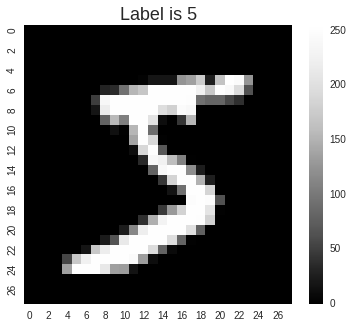

In [4]:
plot_mnist_digit(X[0], y[0]);

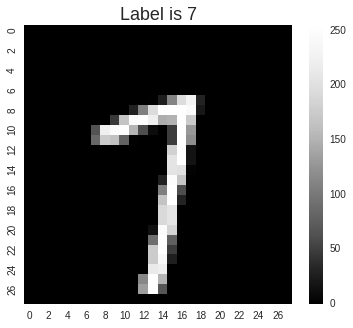

In [5]:
plot_mnist_digit(X[42], y[42]);

# k-NN

### Approach #1 (naive)

Scale data to [0, 1] range

In [49]:
X_scaled = X / 255.
print X_scaled.min(), X_scaled.max()
print X_scaled.shape

0.0 1.0
(60000, 784)


Remove features with low variance (784 -> 444)

In [50]:
X_scaled = VarianceThreshold(0.1).fit_transform(X_scaled)
print X_scaled.min(), X_scaled.max()
print X_scaled.shape

0.0 1.0
(60000, 444)


Now perform mean-std standartization

In [51]:
X_scaled = StandardScaler(copy=False).fit_transform(X_scaled)
print X_scaled.min(), X_scaled.max()
print X_scaled.shape

-1.27419727364 9.78702466824
(60000, 444)


In [3]:
tts = TrainTestSplitter(shuffle=True, random_seed=1337)
for train, test in tts.k_fold_split(y[:1000], n_folds=3, stratify=True):
    print len(train), len(test), len(train) + len(test)

664 336 1000
667 333 1000
669 331 1000
